In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('data/stud.csv')

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
###indepemdent amd dependent features 
x=df.drop(columns=['math_score'],axis=1)

In [31]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [32]:
y=df['math_score']

In [33]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [34]:
##separting the numeric and categorical featires so that we can perform or change this categorical features into 1 and 0 
numeric_feature=x.select_dtypes(exclude='object').columns
cat_feature=x.select_dtypes(include='object').columns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_feature),
        ('StandardScaler',numeric_transformer,numeric_feature)
    ]
)

In [35]:
x=preprocessor.fit_transform(x)

In [36]:
x.shape

(1000, 19)

In [37]:
###train and test the split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [39]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted),
    mae=mean_absolute_error(true,predicted),
    r2_square=r2_score(true,predicted),
    rmse=np.sqrt(mse)
    return r2_square,mae,rmse

In [40]:
models={
    "linearregression":LinearRegression(),
    "ridge":Ridge(),
    "kneighbouringregressor":KNeighborsRegressor(),
    "lasso":Lasso(),
    "decision tree regression":DecisionTreeRegressor(),
    "xgboost":XGBRegressor(),
    "catboost":CatBoostRegressor(),
    "random forest regressor":RandomForestRegressor(),
    "adaboost regressor":AdaBoostRegressor()

}

model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    ###evaluate the train and test the model
    model_train_mae,model_train_r2,model_train_rmse=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_r2,model_test_rmse=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("model train performance")
    print("root mean squared error of train  model is : ",model_train_rmse)
    print("r2 score of train model is : ",model_train_r2)
    print("mean absolute error of train model is : ", model_train_mae)

    print("------------------------")
    print("model performance of test")
    print("root mean squared error of test  model is : ",model_test_rmse)
    print("r2 score of test model is : ",model_test_r2)
    print("mean absolute error of test model is : ", model_test_mae)

    print("========================================================")
    r2_list.append(model_test_r2)
    print('\n')


linearregression
model train performance
root mean squared error of train  model is :  [5.32305085]
r2 score of train model is :  (4.266711846071957,)
mean absolute error of train model is :  (0.8743172040139593,)
------------------------
model performance of test
root mean squared error of test  model is :  [5.39399387]
r2 score of test model is :  (4.21476314247485,)
mean absolute error of test model is :  (0.8804332983749565,)


ridge
model train performance
root mean squared error of train  model is :  [5.32332492]
r2 score of train model is :  (4.264987823725981,)
mean absolute error of train model is :  (0.8743042615212909,)
------------------------
model performance of test
root mean squared error of test  model is :  [5.39038702]
r2 score of test model is :  (4.211100688014261,)
mean absolute error of test model is :  (0.8805931485028737,)


kneighbouringregressor
model train performance
root mean squared error of train  model is :  [5.70768342]
r2 score of train model is :  (4

In [41]:
models.values()

dict_values([LinearRegression(), Ridge(), KNeighborsRegressor(), Lasso(), DecisionTreeRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...), <catboost.core.CatBoostRegressor object at 0x00000256DD93DC30>, RandomForestRegressor(), AdaBoostRegressor()])

In [42]:
### results 
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 score']).sort_values(by=["R2 score"],ascending=False)

,Model name,R2 score
4,decision tree regression,"(6.27,)"
2,kneighbouringregressor,"(5.621,)"
3,lasso,"(5.157881810347763,)"
5,xgboost,"(5.057730674743652,)"
8,adaboost regressor,"(4.798626235633438,)"
7,random forest regressor,"(4.668933333333333,)"
6,catboost,"(4.612531714976557,)"
0,linearregression,"(4.21476314247485,)"
1,ridge,"(4.211100688014261,)"


In [43]:
###linear regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("the r2 score of linear regressionis : ",score)


the r2 score of linear regressionis :  88.04332983749565


Text(0, 0.5, 'predicated')

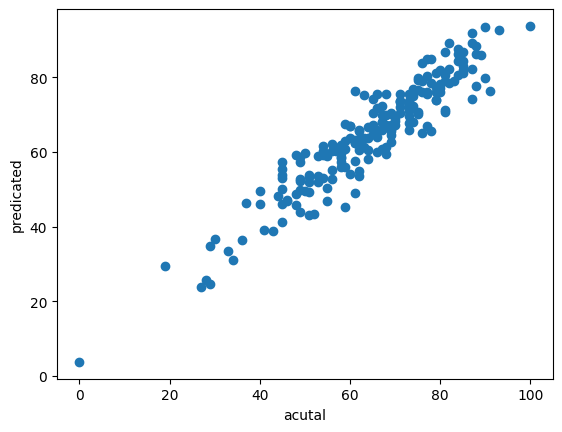

In [44]:
##plt y pred and y test
plt.scatter(y_test,y_pred)
plt.xlabel("acutal")
plt.ylabel("predicated")